## Text classification with preprocessed text : Movie Review



In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

## use this for TF 2.0
!pip install tf-nightly
import tensorflow as tf


from tensorflow import keras

!pip install -q tensorflow-datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)

     |████████████████████████████████| 449.5MB 32kB/s 
     |████████████████████████████████| 460kB 43.7MB/s 
     |████████████████████████████████| 2.9MB 36.5MB/s 
     |████████████████████████████████| 3.9MB 52.1MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
  Created wheel for gast: filename=gast-0.3.2-cp36-none-any.whl size=9679 sha256=3980420439f644da7fa74d04c994a9b23a5d2b9ce559cd5b61ec6848394fc17e
  Stored in directory: /root/.cache/pip/wheels/59/38/c6/234dc39b4f6951a0768fbc02d5b7207137a5b1d9094f0d54bf
Successfully built gast
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
ERROR: tb-nightly 2.2.0a20200106 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled g

2.2.0-dev20200112


In [3]:
## download datasets from imdb

(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)



Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
## encoder

encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
## testing encoding word reversely

sample_string = 'Hello Tensorflow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is: {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('the original string: "{}"'.format(original_string))

assert original_string == sample_string

Encoded string is: [4025, 222, 6307, 2327, 2934, 7975]
the original string: "Hello Tensorflow."


In [7]:
for ts in encoded_string:
  print ('{} -----> {}'.format(ts, encoder.decode([ts])))

4025 -----> Hell
222 -----> o 
6307 -----> Ten
2327 -----> sor
2934 -----> flow
7975 -----> .


## Explore data

In [8]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

Encoded text: [ 249    4  277  309  560    6 6639 4574    2   12]
Label: 1


## Recover original text

In [9]:
encoder.decode(train_example)

"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a cliché, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It's not really Dickens

## Prepare data for training

In [0]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32))

test_batches = (
    test_data
    .padded_batch(32))

## Batch Shape

In [11]:
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("Label shape:", label_batch.shape)

Batch shape: (32, 1359)
Label shape: (32,)
Batch shape: (32, 983)
Label shape: (32,)


## Model building

In [12]:
model = keras.Sequential([
                          keras.layers.Embedding(encoder.vocab_size, 16),
                          keras.layers.GlobalAveragePooling1D(),
                          keras.layers.Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


## hidden unit

## Loss function & optimizer

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model Training

In [14]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 12s 16ms/step - loss: 0.6813 - accuracy: 0.6361 - val_loss: 0.6646 - val_accuracy: 0.6990
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 0.6232 - accuracy: 0.7479 - val_loss: 0.5960 - val_accuracy: 0.7812
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 0.5447 - accuracy: 0.8032 - val_loss: 0.5323 - val_accuracy: 0.8094
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4787 - accuracy: 0.8380 - val_loss: 0.4772 - val_accuracy: 0.8417
Epoch 5/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4248 - accuracy: 0.8611 - val_loss: 0.4360 - val_accuracy: 0.8552
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3853 - accuracy: 0.8759 - val_loss: 0.4030 - val_accuracy: 0.8604
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 0.3518 - accuracy: 0.8849 - val_loss: 0.3782 - val_accuracy: 0.86

## Evaluate model

In [15]:
loss, accuracy = model.evaluate(test_batches)

print("Loss : ", loss)
print("Accuracy :", accuracy)

    782/Unknown - 7s 9ms/step - loss: 0.3364 - accuracy: 0.8729Loss :  0.3363537515806573
Accuracy : 0.87288


## Gaph of accuracy & loss over time

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

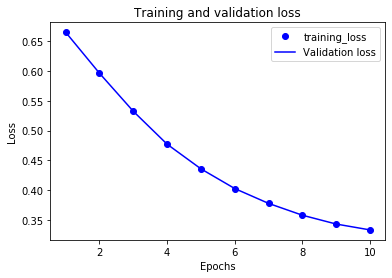

In [17]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['val_loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='training_loss')

# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


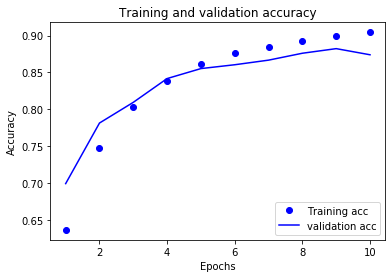

In [18]:
plt.clf() ##clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [0]:
()